# **TRANSJAKARTA** #
___

# **Latar Belakang** #
___

Transjakarta adalah layanan transportasi utama di Jakarta yang mengangkut jutaan penumpang setiap bulannya. Untuk meningkatkan pengalaman dan efisiensi layanan, manajemen membutuhkan data yang dapat membantu memahami pola penggunaan, preferensi penumpang, dan kinerja operasional.

## **Pernyataan Masalah** ##
___

Manajemen Transjakarta ingin mengetahui kapan waktu sibuk, rute mana yang paling banyak digunakan, serta karakteristik demografis pengguna, untuk mengoptimalkan distribusi armada, meningkatkan fasilitas halte, dan membuat kebijakan yang lebih tepat sasaran.

Sebagai seorang data analyst, saya akan mencoba menjawab pertanyaan berikut:

Apa saja pola dan tren utama dalam penggunaan Transjakarta, dan bagaimana data ini bisa mendukung keputusan strategis pada manajemen Transjakarta?

## **DATA UNDERSTANDING & DATA CLEANING** ##

Dataset Transjakarta.csv ini terdiri dari 37.900 data dan 22 kolom :

- transID: ID unik setiap transaksi perjalanan.
- payCardID: ID unik kartu pelanggan.
- payCardBank: Bank penerbit kartu pelanggan.
- payCardName: Nama pelanggan di kartu.
- payCardSex: Jenis kelamin pelanggan.
- payCardBirthDate: Tahun lahir pelanggan.
- corridorID: ID rute perjalanan.
- corridorName: Nama rute atau koridor.
- direction: Arah perjalanan (0 = Pergi, 1 = Pulang).
- tapInStops: ID halte saat tap-in.
- tapInStopsName: Nama halte saat tap-in.
- tapInStopsLat: Koordinat lintang halte tap-in.
- tapInStopsLon: Koordinat bujur halte tap-in.
- topStartSeq: Urutan halte dalam rute (saat tap-in).
- tapInTime: Waktu tap-in pelanggan.
- tapOutStops: ID halte saat tap-out.
- tapOutStopsName: Nama halte saat tap-out.
- tapOutStopsLat: Koordinat lintang halte tap-out.
- tapOutStopsLon: Koordinat bujur halte tap-out.
- stopEndSeq: Urutan halte dalam rute (saat tap-out).
- tapOutTime: Waktu tap-out pelanggan.
- payAmount: Jumlah yang dibayar untuk perjalanan.

Berikut adalah 5 data teratas dan terbawah dari dataset transjakarta:

In [174]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv("Transjakarta.csv")
display(df.head(5))
display(df.tail(5))

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


In [175]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [177]:
df.isna().sum()/len(df)*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64


Kolom tapOutStopsName berhubungan dengan `tapOutStops` , `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`. Missing value pada kolom `tapOutStopsName` kemungkinan disebabkan karena missing value pada `tapOutStops`. Sehingga jika dilakukan pengisian berdasarkan kolom lainnya dikhawatirkan kurang efektif sehingga menyebabkan kurang akuratnya proses analisis. Jadi missing value pada `tapOutStopName` lebih baik didrop saja

In [178]:
df = df.dropna(subset=['tapOutStopsName'])

Missing value pada kolom `tapInStops` dan `tapOutStops` dapat ditangani dengan melihat data pada kolom `tapInStopsName` dan `tapOutStopsName` pada data yang terjadi missing value. pengisiannya dapat dilakukan dengan cara melihat data transaksi lainnya sebagai referensi yang memiliki data `tapInStopsName` dan `tapOutStopsName` yang sama dengan data transaksi yang terjadi missing value, dengan begitu kolom `tapInStops` dan `tapOutStops` yang missing value dapat diisi sama dengan transaksi yang sama.

In [179]:
# Data referensi yang sudah bersih dari duplicate dan missing value

reference_data_stops = df.dropna(subset=['tapInStops', 'tapOutStops', 'tapInStopsName', 'tapOutStopsName'])
reference_data_stops = reference_data_stops[['tapInStops', 'tapOutStops', 'tapInStopsName', 'tapOutStopsName']].drop_duplicates()

# Dictionary untuk mapping berdasarkan tapInStopsName dan tapOutStopsName
tapInStops_map = reference_data_stops.set_index(['tapInStopsName'])['tapInStops'].to_dict()
tapOutStops_map = reference_data_stops.set_index(['tapOutStopsName'])['tapOutStops'].to_dict()

# 3. Penanganan missing values pada tapInStops dan tapOutStops berdasarkan referensi yang sudah dibuat
df['tapInStops'] = df.apply(
    lambda row: row['tapInStops'] if pd.notna(row['tapInStops']) 
    else tapInStops_map.get(row['tapInStopsName']), axis=1
)

df['tapOutStops'] = df.apply(
    lambda row: row['tapOutStops'] if pd.notna(row['tapOutStops']) 
    else tapOutStops_map.get(row['tapOutStopsName']), axis=1
)

print(df.isna().sum() / len(df) * 100)


transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.296313
corridorName        5.071671
direction           0.000000
tapInStops          0.087537
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         0.051975
tapOutStopsName     0.000000
tapOutStopsLat      0.000000
tapOutStopsLon      0.000000
stopEndSeq          0.000000
tapOutTime          0.000000
payAmount           2.647992
dtype: float64


Missing value pada kolom `corridorID` dan `corridorName` pengangananya sama seperti penanganan missing value pada kolom `tapInStops` dan `tapOutStops`. yang membedakan hanya pada kolom referensinya saja, yaitu pada penanganan missing value di kolom `corridorID` dan `coriddorName`, kolom yang dijadikan sebagai data referensi yaitu berdasarkan `tapInStopsName` dan `tapOutStopsName`

In [180]:

# Data Referensi 
reference_data = df.dropna(subset=['corridorID', 'corridorName'])
reference_data = reference_data[['tapInStopsName', 'tapOutStopsName', 'corridorID', 'corridorName']].drop_duplicates()

# Dictionary untuk mapping berdasarkan tapInStopsName dan tapOutStopsName
corridorID_map = reference_data.set_index(['tapInStopsName', 'tapOutStopsName'])['corridorID'].to_dict()
corridorName_map = reference_data.set_index(['tapInStopsName', 'tapOutStopsName'])['corridorName'].to_dict()

# Penanganan missing values pada corridorID dan corridorName
df['corridorID'] = df.apply(
    lambda row: row['corridorID'] if pd.notna(row['corridorID']) 
    else corridorID_map.get((row['tapInStopsName'], row['tapOutStopsName'])), axis=1
)

df['corridorName'] = df.apply(
    lambda row: row['corridorName'] if pd.notna(row['corridorName']) 
    else corridorName_map.get((row['tapInStopsName'], row['tapOutStopsName'])), axis=1
)

df.isna().sum()


transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID           81
corridorName        124
direction             0
tapInStops           32
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops          19
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount           968
dtype: int64

Pada kolom `corridorID` dan `corridorName` ini berhubungan satu sama lain, sehingga beberapa data missing value yang terjadi diantara kedua kolom tersebut dapat ditangani dengan cara melihat salah satu data dari kolom tersebut, sehingga seharusnya missing value pada kedua kolom tersebut sama.

In [181]:
# Data Referensi
reference_data = df.dropna(subset=['corridorID', 'corridorName'])
reference_data = reference_data[['tapInStopsName', 'tapOutStopsName', 'corridorID', 'corridorName']].drop_duplicates()

# Dictionary untuk mapping berdasarkan salah satu data dari kolom corridorID dan corridorName
corridorID_map = reference_data.set_index(['corridorName'])['corridorID'].to_dict()
corridorName_map = reference_data.set_index(['corridorID'])['corridorName'].to_dict()

# Imputasi missing values pada corridorID dan corridorName
df['corridorID'] = df.apply(
    lambda row: row['corridorID'] if pd.notna(row['corridorID']) 
    else corridorID_map.get(row['corridorName']), axis=1
)

df['corridorName'] = df.apply(
    lambda row: row['corridorName'] if pd.notna(row['corridorName']) 
    else corridorName_map.get(row['corridorID']), axis=1
)

df.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID           73
corridorName         73
direction             0
tapInStops           32
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops          19
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount           968
dtype: int64

**Dari dataset transjakarta ini, dapat dilihat bahwa penentuan harga pada kolom `payAmount` berdasarkan corridorID yang digunakan**.
dan setelah dilihat pada datanya, `payAmount` yang bernilai missing value itu menggunakan corridorID yang memang `payAmount`nya adalah 0.

**Sehingga missing value yang terjadi pada kolom payAmount ini dapat dilakukan pengisian dengan value 0**

In [182]:
# Mengubah missing values pada kolom payAmount menjadi 0
df['payAmount'] = df['payAmount'].fillna(0)

In [183]:
df.isna().sum()

transID              0
payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID          73
corridorName        73
direction            0
tapInStops          32
tapInStopsName       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapInTime            0
tapOutStops         19
tapOutStopsName      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
tapOutTime           0
payAmount            0
dtype: int64

Untuk penanganan missing value yang tersisa pada kolom `corridorID`, `corridorName`, `tapInStops` dan `tapOutStops`, karena proporsinya tidak banyak dan memang tidak ada cara yang dirasa efektif untuk dilakukan (*Jika dilihat dari datanya memang hanya ada sedikit transaksi/data history sebelumnya,sehingga tidak dapat ditangani berdasarkan history sebelumnya*), maka kita dapat drop saja datanya.

In [184]:
df.dropna(subset=['corridorID','corridorName','tapInStops','tapOutStops'], inplace=True)

In [185]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

**Check dan ubah Format datetime pada kolom `tapInTime` `tapOutTime` agar memudahkan proses analisis puncak kesibukan operasionalnya**

In [186]:

df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36433 non-null  object        
 1   payCardID         36433 non-null  int64         
 2   payCardBank       36433 non-null  object        
 3   payCardName       36433 non-null  object        
 4   payCardSex        36433 non-null  object        
 5   payCardBirthDate  36433 non-null  int64         
 6   corridorID        36433 non-null  object        
 7   corridorName      36433 non-null  object        
 8   direction         36433 non-null  float64       
 9   tapInStops        36433 non-null  object        
 10  tapInStopsName    36433 non-null  object        
 11  tapInStopsLat     36433 non-null  float64       
 12  tapInStopsLon     36433 non-null  float64       
 13  stopStartSeq      36433 non-null  int64         
 14  tapInTime         36433 non

## **ANALISIS** ##
___

Pada bagian data analisis, saya akan melakukan eksplorasi terhadap pola penggunaan Transjakarta dengan menganalisis waktu sibuk (jam, hari, bulan), rute yang paling banyak digunakan, serta karakteristik demografis pengguna. Selain itu, saya akan menganalisis durasi perjalanan, frekuensi penggunaan halte, dan pola pembayaran untuk memberikan wawasan yang dapat digunakan untuk pengambilan keputusan yang lebih efisien dalam pengelolaan armada dan fasilitas.

In [189]:
df1 = df.copy()

Untuk memudahkan proses analisis waktu sibuk operasional, maka akan dibuat kolom baru yang berisi:
- `tapInDay`: Hari dilakukan transaksi (Tap In)
- `tapInHour`: Jam tap in
- `tapOutHour`: Jam tap out
- `Duration`: Durasi perjalanan dalam satuan menit (`tapOutHour` - `tapInHour`)
- `payCardAge`: Usia penumpang (Diasumsikan bahwa usia penumpang sama seperti usia/lamanya `payCard`)

In [190]:
# Tambah kolom baru untuk memisahkan hari dan jam (tapInDay,tapInHour,tapOutHour, Duration dan payCardAge)

df1['tapDay'] = df1['tapInTime'].dt.day_name()
df1['tapInHour'] = df1['tapInTime'].dt.hour
df1['tapOutHour'] = df1['tapOutTime'].dt.hour

# duration untuk melihat durasi perjalanan dalam satuan menit
# payCardAge untuk melihat umur penumpang berdasarkan payCardBirthDate
df1['duration'] = (df1['tapOutTime'] - df1['tapInTime']).dt.total_seconds()/60
df1['payCardAge'] = 2024 - df1['payCardBirthDate']

df1.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapDay,tapInHour,tapOutHour,duration,payCardAge
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Monday,5,6,39.150000,16
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Monday,5,6,57.283333,27
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Monday,5,6,51.816667,32
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Monday,5,6,43.416667,46
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Monday,6,6,39.466667,42


In [116]:
df1.to_csv('transjakarta_Dataframe.csv', index=False)

**`payCardBank` Distribution**

Untuk menganalisa persebaran payCardBank yang digunakan oleh penumpang transjakarta.

In [191]:
passenger = df1[['payCardName','payCardSex','payCardAge', 'payCardBank']]

bank_dist = passenger['payCardBank'].value_counts().reset_index(name='count')
bank_dist

,payCardBank,count
0,dki,17999
1,emoney,6611
2,brizzi,3387
3,flazz,3100
4,online,2761
5,bni,2575


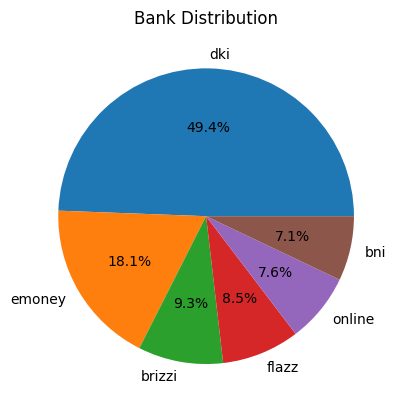

In [192]:
# Distribusi Bank

plt.pie(bank_dist['count'], labels=bank_dist['payCardBank'], autopct='%1.1f%%')
plt.title('Bank Distribution')
plt.show()

Dari hasil analisis distribusi bank pada dataset ini,  dapat ditarik beberapa kesimpulan:

1. **Bank DKI** merupakan penerbit kartu yang paling banyak digunakan oleh pelanggan Transjakarta, dengan jumlah pengguna mencapai 49.4% dari total seluruh pengguna. Hal ini menunjukkan bahwa setengah dari keseluruhan pengguna Transjakarta menggunakan kartu dari Bank DKI, yang dapat menjadi fokus utama dalam perencanaan layanan dan promosi.

2. Selain Bank DKI, kartu e-money seperti **Emoney** (18.1%), **Brizzi** (9.3%), dan **Flazz** (8.5%) juga banyak digunakan, mencerminkan kecenderungan pelanggan untuk menggunakan kartu prabayar dalam transaksi pembayaran.

Penggunaan Kartu Online dan Bank Lain: Kartu dari bank lain, seperti BNI dan kartu online memiliki distribusi yang lebih rendah, tetapi tetap memberikan gambaran tentang preferensi pelanggan dalam memilih metode pembayaran.

**Distribusi range Usia penumpang**

In [194]:
# Distribusi Penumpang dari range umur

bins = [10, 20, 31, 40, 50, 60, 70, 80]
labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70+']

passengerAge_counted = pd.cut(passenger['payCardAge'], bins=bins, labels=labels, include_lowest=True).value_counts().reset_index(name='count')

passengerAge_counted.columns = ['age_range', 'count']
passengerAge_counted = passengerAge_counted.sort_values('age_range')
passengerAge_counted


,age_range,count
2,10-19,6782
1,20-29,8893
0,30-39,10177
3,40-49,6617
4,50-59,3221
5,60-69,417
6,70+,326


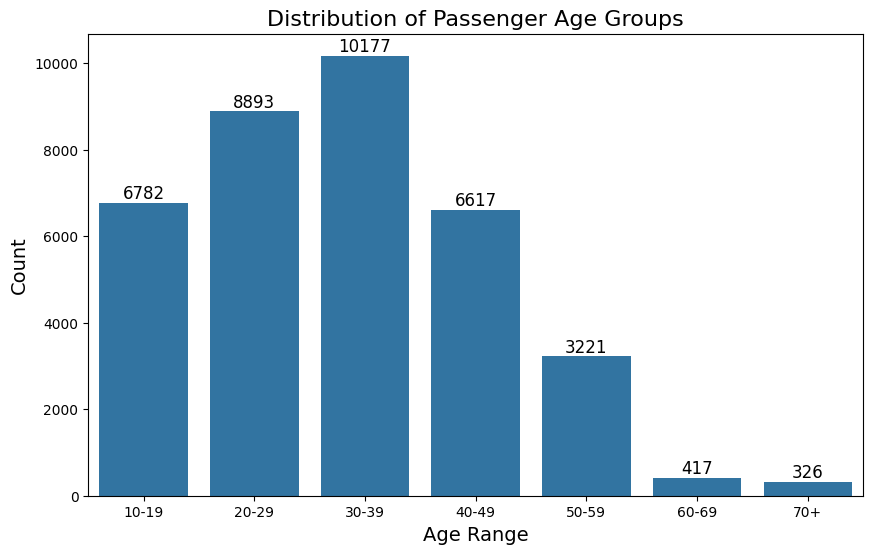

In [196]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_range', y='count', data=passengerAge_counted)

for index, value in enumerate(passengerAge_counted['count']):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Passenger Age Groups', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


Jika kita menganggap usia produktif kerja adalah rentang usia 20-40 tahun, maka berdasarkan hasil distribusi usia penumpang Transjakarta, kita bisa menarik beberapa kesimpulan:

Kelompok usia 20-39 tahun, yang termasuk dalam kategori usia produktif (pekerja), memiliki jumlah penumpang terbesar. Rentang usia 30-39 tahun mencatatkan 10.177 penumpang, dan usia 20-29 tahun sebanyak 8.893 penumpang.
Total penumpang dalam rentang usia produktif (20-39 tahun) mencapai 19.703 penumpang. Ini menunjukkan bahwa sebagian besar pengguna Transjakarta adalah pekerja yang menggunakan layanan ini untuk bepergian ke tempat kerja.

**Gender Distribution**

In [197]:
gender = df1['payCardSex'].value_counts().reset_index(name='count')
gender['payCardSex'] = gender['payCardSex'].replace({'M':'Male', 'F':'Female'})
gender

,payCardSex,count
0,Female,19397
1,Male,17036


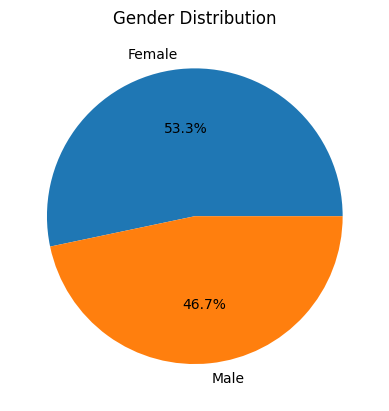

In [72]:
plt.pie(gender['count'], labels=gender['payCardSex'], autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

**Peak Day**

In [198]:
days = df1['tapDay'].value_counts().reset_index(name='count')
days

,tapDay,count
0,Friday,6645
1,Monday,6604
2,Tuesday,6591
3,Wednesday,6574
4,Thursday,6574
5,Sunday,1730
6,Saturday,1715


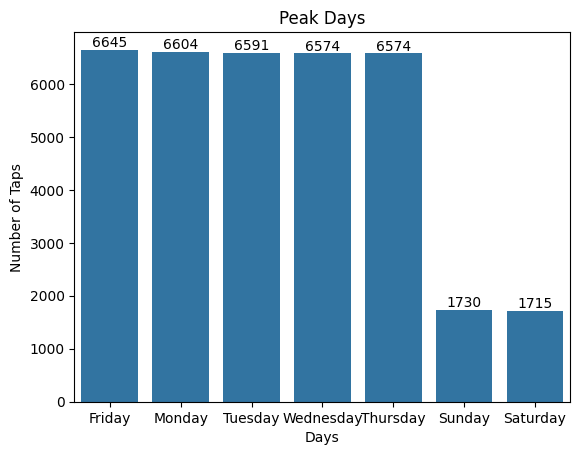

In [199]:
sns.barplot(data=days, x='tapDay',y='count', order=days['tapDay'])
for index, value in enumerate(days['count']):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)
plt.title('Peak Days')
plt.xlabel('Days')
plt.ylabel('Number of Taps')
plt.show()

1. Berdasarkan distribusi data penumpang Transjakarta per hari, terlihat bahwa hari kerja, terutama Jumat dan Senin, memiliki volume penumpang yang paling tinggi, dengan jumlah transaksi mencapai lebih dari 6.600, sementara Minggu dan Sabtu mencatatkan jumlah transaksi yang jauh lebih rendah, sekitar 1.700. Hal ini menunjukkan kebutuhan untuk penyesuaian armada dan jadwal pada hari-hari sibuk, khususnya pada jam puncak, untuk mengurangi kepadatan, serta penghematan operasional pada akhir pekan. 
2. Selain itu, pola penggunaan yang lebih tinggi pada hari kerja menunjukkan bahwa sebagian besar pengguna Transjakarta adalah pekerja yang melakukan perjalanan rutin selama hari kerja.

**Peak Hour**

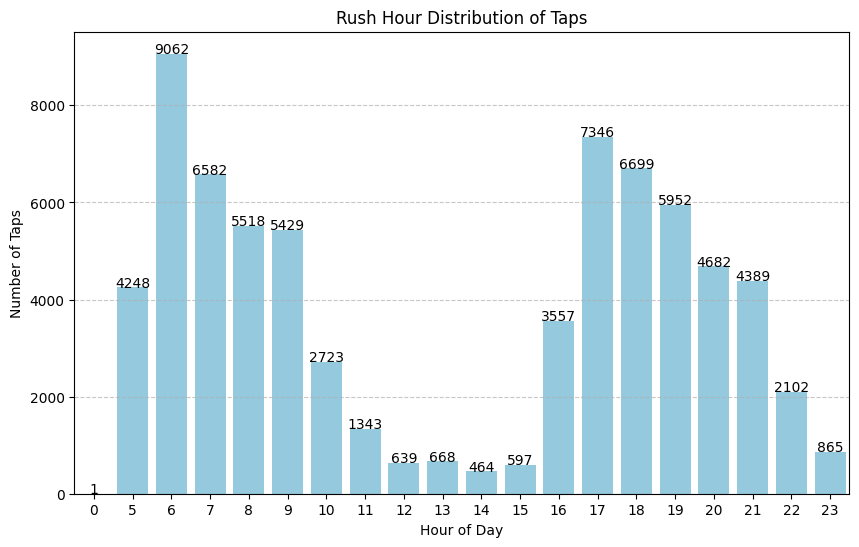

In [204]:
rush_hour = df1.copy()

# Menghitung jumlah taps untuk tiap jam pada tapIn dan tapOut
tap_in_counts = rush_hour.groupby('tapInHour')['payCardID'].count()
tap_out_counts = rush_hour.groupby('tapOutHour')['payCardID'].count()

# combine hitungan taps pada jam yang sama
combined_tap_counts = tap_in_counts.add(tap_out_counts, fill_value=0).sort_index()
rush_hour_df = combined_tap_counts.reset_index()
rush_hour_df.columns = ['Hour', 'Total Taps']

# # Step 5: Visualisasi menggunakan Seaborn dengan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Total Taps', data=rush_hour_df, color="skyblue")
plt.title('Rush Hour Distribution of Taps')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Taps')

for index, row in rush_hour_df.iterrows():
    plt.text(row.name, row['Total Taps'] + 5, int(row['Total Taps']), color='black', ha="center")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


Dari hasil analisis ini, terlihat bahwa **jam sibuk pada layanan Transjakarta terjadi pada pagi hari antara pukul 6 hingga 9**, dengan puncak tertinggi pada pukul 6 pagi (9,062 taps) dan mulai menurun setelah jam 9 pagi. Selain itu, **ada juga puncak lain pada sore hari antara pukul 16 hingga 17** yang menunjukkan lonjakan penggunaan menjelang jam pulang kantor, dengan jumlah taps mencapai 7,346 pada pukul 17. Jam-jam lainnya, terutama malam hari, menunjukkan penggunaan yang jauh lebih rendah. **Hal ini mengindikasikan bahwa Transjakarta paling banyak digunakan pada jam-jam perjalanan menuju dan pulang dari tempat kerja.**


**Tap Stops**

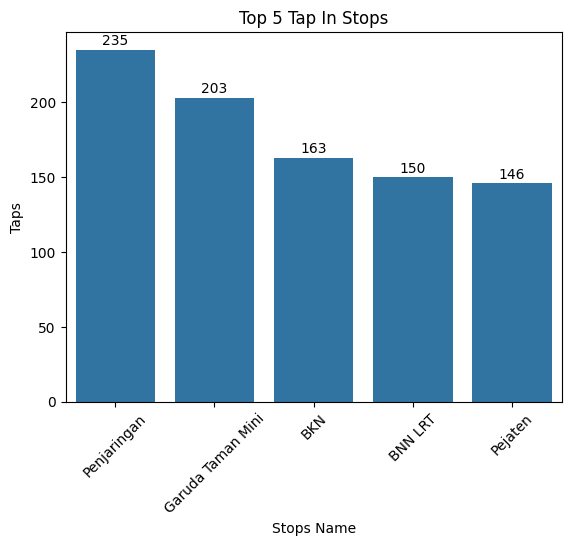

In [206]:
# TapIn Station
tapInStation = df1['tapInStopsName'].value_counts().reset_index(name='total_taps')

sns.barplot(x='tapInStopsName', y='total_taps', data=tapInStation.head(5))
for index, value in enumerate(tapInStation['total_taps'].head(5)):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)
plt.xlabel('Stops Name')
plt.ylabel('Taps')
plt.title('Top 5 Tap In Stops')
plt.xticks(rotation=45)
plt.show()

In [207]:
TapInStats = df1.groupby(['tapInStopsName','tapInHour'])['tapInStops'].count().reset_index()
TapInStats = TapInStats.sort_values('tapInStops', ascending = False, ignore_index= True)
TapInStats.head(5)

,tapInStopsName,tapInHour,tapInStops
0,Penjaringan,17,50
1,Garuda Taman Mini,6,47
2,Cibubur Junction,17,41
3,BKN,17,39
4,BNN LRT,17,38


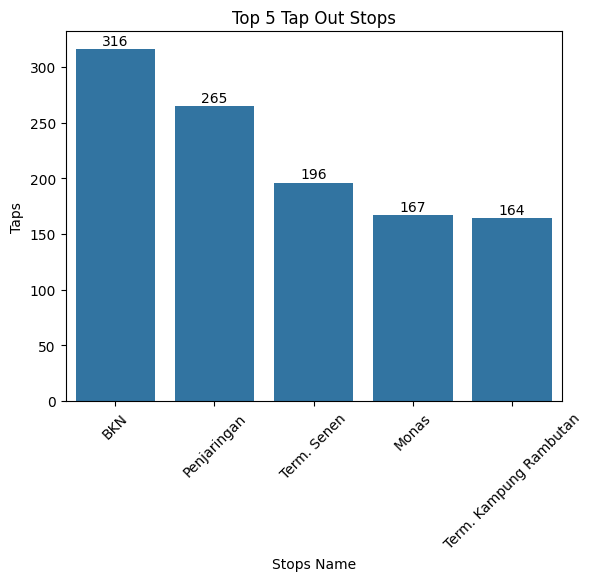

In [208]:
# Tap out Station
tapOutStation = df1['tapOutStopsName'].value_counts().reset_index(name='total_taps')
sns.barplot(x='tapOutStopsName', y='total_taps', data=tapOutStation.head(5))
for index, value in enumerate(tapOutStation['total_taps'].head(5)):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)
plt.xlabel('Stops Name')
plt.ylabel('Taps')
plt.title('Top 5 Tap Out Stops')
plt.xticks(rotation=45)
plt.show()

In [219]:
TapOutStats = df1.groupby(['tapOutStopsName','tapOutHour'])['tapOutStops'].count().reset_index()
TapOutStats = TapOutStats.sort_values('tapOutStops', ascending = False, ignore_index= True)
TapOutStats.head(5)

,tapOutStopsName,tapOutHour,tapOutStops
0,BKN,18,48
1,Masjid Agung,6,38
2,BKN,7,37
3,Penjaringan,7,36
4,BKN,6,36


In [221]:
# Mengelompokkan data berdasarkan tap in dan tap out untuk melihat rute
route_usage = df1.groupby(['tapInStopsName', 'tapOutStopsName']).size().reset_index(name='trip_count')
route_usage = route_usage.sort_values('trip_count', ascending=False).reset_index(drop=True)

#  5 rute teratas
top_routes = route_usage.head(5)
print("Top 5 most popular routes:")
display(top_routes)

#  5 rute terbawah
least_routes = route_usage.tail(5)
print("\nTop 5 least popular routes:")
display(least_routes)


Top 5 most popular routes:


,tapInStopsName,tapOutStopsName,trip_count
0,Rusun Kapuk Muara,Penjaringan,125
1,Penjaringan,Rusun Kapuk Muara,117
2,Garuda Taman Mini,BKN,100
3,Cibubur Junction,BKN,88
4,Garuda Taman Mini,Pinang Ranti,85



Top 5 least popular routes:


,tapInStopsName,tapOutStopsName,trip_count
4298,Wisma Mandiri,Tosari 1,1
4299,Wisma Subud,Simpang Pinang I Pondok Labu,1
4300,Ampera 1,St. Tj. Barat 1,1
4301,Ampera 1,Syibi,1
4302,Ampera Garden,Jln. Taman Kemang,1


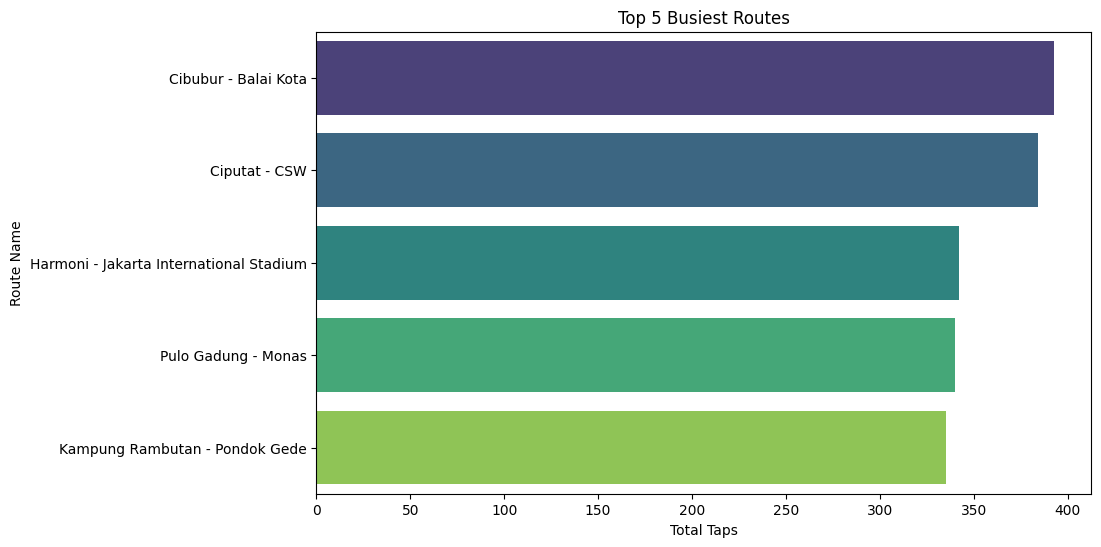

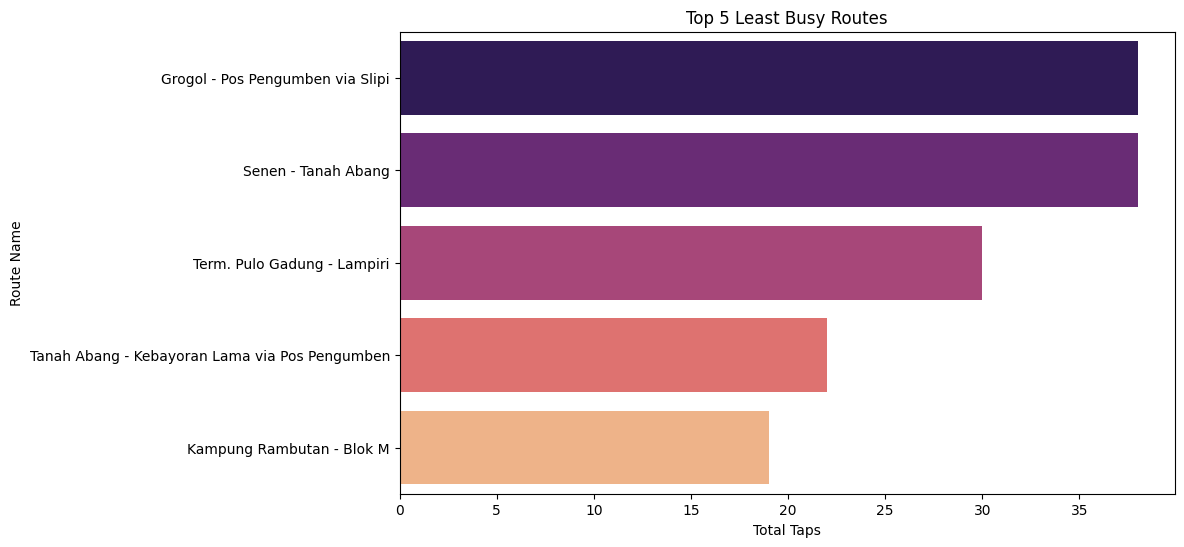

In [222]:
# Mengelompokkan data berdasarkan rute atau koridor
route_stats = df1.groupby('corridorName')['tapInStops'].count().reset_index(name='total_taps')
route_stats = route_stats.sort_values('total_taps', ascending=False).reset_index(drop=True)

# 5 rute dengan jumlah pengguna tertinggi
top_routes = route_stats.head(5)
least_routes = route_stats.tail(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_routes, x='total_taps', y='corridorName', palette='viridis')
plt.title("Top 5 Busiest Routes")
plt.xlabel("Total Taps")
plt.ylabel("Route Name")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=least_routes, x='total_taps', y='corridorName', palette='magma')
plt.title("Top 5 Least Busy Routes")
plt.xlabel("Total Taps")
plt.ylabel("Route Name")
plt.show()



In [223]:
display(top_routes)
display(least_routes)

,corridorName,total_taps
0,Cibubur - Balai Kota,393
1,Ciputat - CSW,384
2,Harmoni - Jakarta International Stadium,342
3,Pulo Gadung - Monas,340
4,Kampung Rambutan - Pondok Gede,335


,corridorName,total_taps
211,Grogol - Pos Pengumben via Slipi,38
212,Senen - Tanah Abang,38
213,Term. Pulo Gadung - Lampiri,30
214,Tanah Abang - Kebayoran Lama via Pos Pengumben,22
215,Kampung Rambutan - Blok M,19


Dari hasil analisis rute, terlihat bahwa rute Cibubur - Balai Kota merupakan yang paling sibuk dengan total 393 taps, diikuti oleh Ciputat - CSW (384 taps) dan Harmoni - Jakarta International Stadium (342 taps). Ini menunjukkan bahwa rute-rute ini memiliki permintaan penumpang yang tinggi, mungkin karena melayani daerah padat penduduk atau area perkantoran yang banyak dijangkau penumpang.

## **Kesimpulan dan Rekomendasi** ##

**Kesimpulan Utama dari Analisis**
1. Top 5 Rute Paling Sibuk dan Paling Sepi:
- Rute dengan jumlah penumpang tertinggi, seperti Cibubur - Balai Kota dan Ciputat - CSW, menunjukkan kebutuhan armada yang lebih besar pada rute-rute ini
- Di sisi lain, rute yang paling sepi, seperti Grogol - Pos Pengumben dan Kampung Rambutan - Blok M, menunjukkan penggunaan yang rendah, yang mungkin perlu dievaluasi apakah frekuensi layanan pada rute ini sudah optimal atau perlu pengurangan.

2. Distribusi Pengguna Berdasarkan Waktu: Waktu sibuk terjadi di pagi hari (sekitar pukul 6-9) dan sore hari (pukul 17-19), yang mencerminkan kebutuhan perjalanan yang terkait dengan jam kerja. Hari kerja juga mendominasi jumlah perjalanan, sedangkan akhir pekan menunjukkan penurunan signifikan dalam jumlah penumpang.

3. Karakteristik Demografis Pengguna: Mayoritas penumpang berada dalam kelompok usia produktif (20-40 tahun), yang kemungkinan besar merupakan pekerja. Selain itu, jenis kartu pembayaran yang dominan berasal dari Bank DKI dan e-money lainnya, mengindikasikan preferensi metode pembayaran elektronik yang lebih praktis di kalangan pengguna.

**Rekomendasi**
1. Penyesuaian Armada Berdasarkan Kepadatan Rute
- Tingkatkan alokasi armada dan frekuensi keberangkatan di rute-rute tersibuk, seperti Cibubur - Balai Kota dan Ciputat - CSW, khususnya pada jam sibuk, untuk mengurangi kemacetan dan meningkatkan kenyamanan penumpang.
- Perlu dilakukannya evaluasi kembali frekuensi layanan di rute-rute yang paling sepi, seperti Grogol - Pos Pengumben dan Kampung Rambutan - Blok M, mengurangi jumlah armada di rute-rute ini dan menyesuaikan jadwal layanan dapat mengalokasikan sumber daya lebih efektif ke rute dengan permintaan yang lebih tinggi.

2. Peningkatan Fasilitas di Titik Naik-Turun pada Rute Sibuk: Fasilitas halte di sepanjang rute sibuk, terutama halte pada rute seperti Cibubur - Balai Kota dan Ciputat - CSW, perlu ditingkatkan untuk mengakomodasi jumlah penumpang yang lebih tinggi. Penyediaan fasilitas yang lebih baik seperti tempat duduk, dan informasi rute akan meningkatkan kenyamanan penumpang.

3. Promosi dan Edukasi Penggunaan E-money: Mengembangkan program insentif atau kampanye edukasi untuk mendorong penggunaan e-money di kalangan penumpang. Penggunaan kartu elektronik secara luas tidak hanya memudahkan penumpang, tetapi juga mempercepat proses naik-turun penumpang, mengurangi waktu tunggu, dan meningkatkan efisiensi operasional keseluruhan.